<a href="https://colab.research.google.com/github/diogoqds/portfolio/blob/master/Analisando_os_Dados_do_Airbnb_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**


---

# Análise dos Dados do Airbnb - *Londres*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-04-14/visualisations/listings.csv")

## Análise dos Dados

Essa etapa consiste em ver quais as variáveis temos em nosso dataset e verificar com quais vamos trabalhar para fazer uma análise

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,2,359
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.71,1,232
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,307
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,362
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.70,1,15


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de dados que nosso dataset possui e ver os tipos de dados de cada coluna.

Este dataset é uma versão resumida do Airbnb. Na mesma página que baixamos temos um outro arquivo mais completo com mais colunas e um maior número de dados, você pode procurar pelo `listings.csv.gz`

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 86358
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Em uma análise de dados é importante ter um dataset com uma boa qualidade, e a qualidade de uma dataset está associada com a quantidade de valores ausentes. Então antes de nos aprofundarmos nas análises vamos ver qual a porcentagem de valores nulos nosso dataset possui.

### **Q3. Qual o tipo de distribuição das variáveis?** 

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.249149
last_review                       0.249149
name                              0.000278
host_name                         0.000116
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* Podemos perceber que a coluna `neighbourhood_group` está totalmente vazia
* As colunas `reviews_per_month` e `last_review` possuem cerca de 20% de seus valores nulos

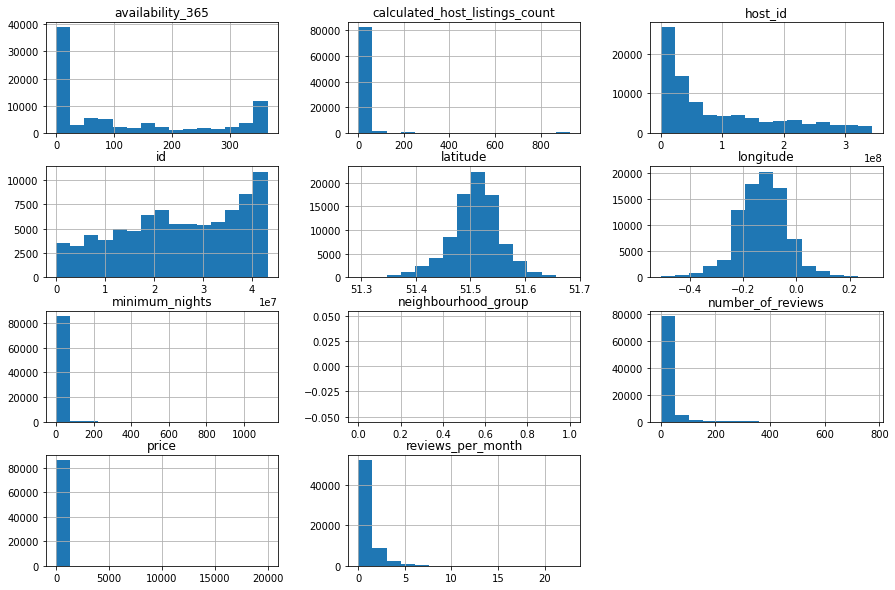

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize = (15,10));

### **Q4. Há outliers presentes?**

Pelo nosso histograma, é possível verificar indícios de outliers, os outliers são dados fora da curva, siginifica que são dados muito difentes dos outros, podem ser muito pequenos ou muito grandes.
Por exemplo a coluna `price` parece ser um outlier.

Podemos confirmar a presença de um outliers com duas maneiras simples:
* Um resumo estastístico usando o método describe()
* Plotar `boxplots` para a variável


In [9]:
# ver o resumo estatístico das variáveis numéricas
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,86358.000000,86358.000000,86358.000000,64842.000000,86358.000000,86358.000000
mean,129.610725,4.474490,17.531277,0.963183,20.987448,116.328898
std,289.484146,19.151568,37.393948,1.177591,100.232081,135.293902
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,83.000000,2.000000,4.000000,0.560000,1.000000,63.000000
75%,140.000000,3.000000,17.000000,1.270000,5.000000,237.000000
max,19985.000000,1125.000000,773.000000,22.690000,928.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses:
* A variável `price` possui 75% do valor abaixo de 140, mas seu valor máximo é de 19985
* A variável `minimum_nights` possui 75% do valor abaixo de 3, mas seu valor máximo é de 1125, o que é estranho para o mínimo de noites para alguel

#### Boxplot para minimum_nights

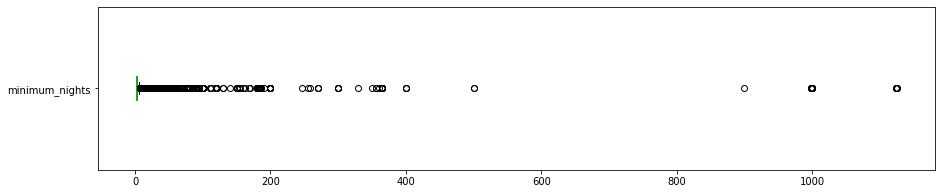

minimum_nights: valores acima de 90:
259 entradas
0.2999%


In [22]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 90 dias para minimum_nights
print("minimum_nights: valores acima de 90:")
print("{} entradas".format(len(df[df.minimum_nights > 90])))
print("{:.4f}%".format((len(df[df.minimum_nights > 90]) / df.shape[0])*100))

#### Boxplot para price


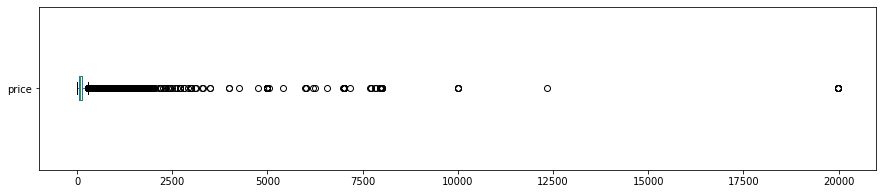


price: valores acima de 1500
155 entradas
0.1795%


In [23]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

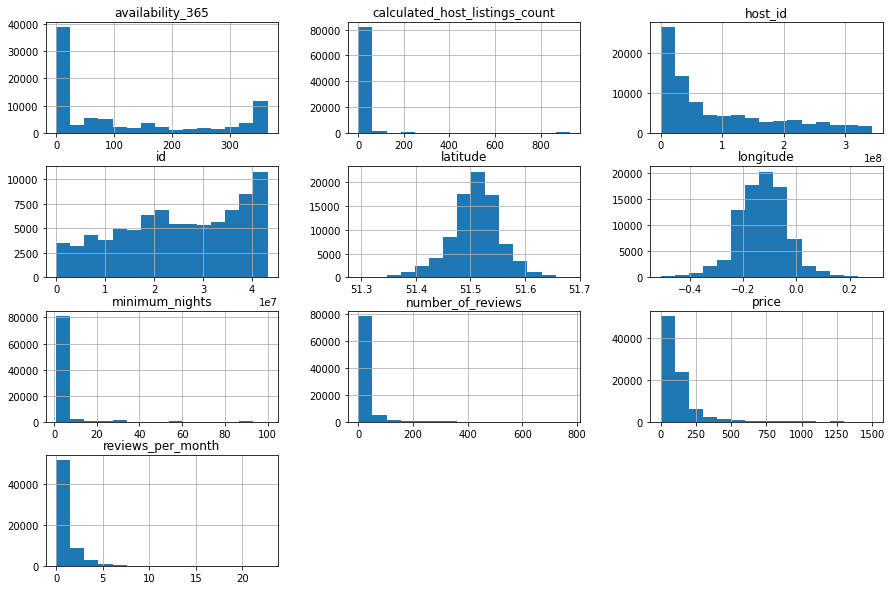

In [24]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 100].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

In [25]:
# ver a média da coluna `price``
df['price'].mean()


129.6107251210079

### **Q6. Qual a correlação existente entre as variáveis**

A correlação é a dependência ou associação entre duas variáveis

In [26]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.011794,-0.099594,-0.061086,0.304542,0.130301
minimum_nights,0.011794,1.000000,-0.051351,-0.092291,-0.019375,0.043757
number_of_reviews,-0.099594,-0.051351,1.000000,0.679678,-0.056818,0.105642
reviews_per_month,-0.061086,-0.092291,0.679678,1.000000,-0.047987,0.124955
calculated_host_listings_count,0.304542,-0.019375,-0.056818,-0.047987,1.000000,0.022632
availability_365,0.130301,0.043757,0.105642,0.124955,0.022632,1.000000


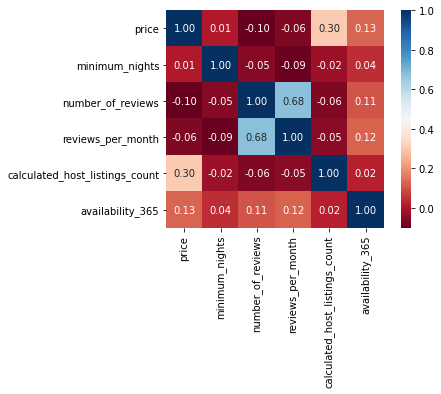

In [27]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor="white", annot=True);

Pelo gráfico podemos perceber que `reviews_per_month` e `number_of_reviews` possuem uma correlação positiva,  ou seja se uma aumentar a outra também aumenta, o que faz todo sentido.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o tipo de locação no Airbnb, quem já usou sabe que existe a opção de alugar casas, apartamentos, alugar um quarto individual ou até mesmo compartilhar um quarto com outras pessoas.

Vamos contar a quantidade para cada tipo de alugel, para isso vamos usar o método `value_countes()`

In [28]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    48335
Private room       36263
Hotel room           750
Shared room          669
Name: room_type, dtype: int64

In [29]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.561924
Private room       0.421579
Hotel room         0.008719
Shared room        0.007778
Name: room_type, dtype: float64

O aluguel de casas e apartamentos inteiros é o mais comum, com cerca de 59% dos aluguéis sendo dessa categoria.

### **Q8. Qual a localidade mais cara do dataset?**



In [30]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kensington and Chelsea    201.807590
Westminster               196.222538
City of London            178.428279
Camden                    149.658788
Hammersmith and Fulham    145.408047
Richmond upon Thames      126.437655
Wandsworth                121.494004
Islington                 116.994416
Southwark                 114.354597
Merton                    107.757174
Name: price, dtype: float64

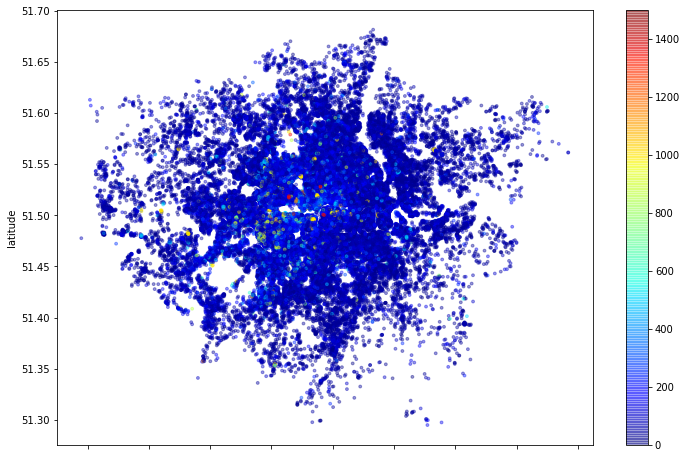

In [31]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [32]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

3.86653800992827

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 


Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.